# Basics

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.cluster import KMeans

RSEED=33

In [2]:
# load data

original_train = pd.read_csv('data/Train.csv')
original_test = pd.read_csv('data/Test.csv')
variables = pd.read_csv('data/VariableDefinitions.csv')

In [3]:
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [4]:
original_train.columns = ["country", "year", "uniqueid", "bank_account", "location", "cellphone", "household", "age", "gender", "status_household", "marital_status", "education", "job"]
original_train.head(2)

,country,year,uniqueid,bank_account,location,cellphone,household,age,gender,status_household,marital_status,education,job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent


In [5]:
original_train.shape

(23524, 13)

In [6]:
# check for missing values 

original_train.isnull().sum()

country             0
year                0
uniqueid            0
bank_account        0
location            0
cellphone           0
household           0
age                 0
gender              0
status_household    0
marital_status      0
education           0
job                 0
dtype: int64

In [7]:
original_train.isna().sum()

country             0
year                0
uniqueid            0
bank_account        0
location            0
cellphone           0
household           0
age                 0
gender              0
status_household    0
marital_status      0
education           0
job                 0
dtype: int64

In [8]:
# check for unique values (to detect duplicates)

original_train.nunique()

country                4
year                   3
uniqueid            8735
bank_account           2
location               2
cellphone              2
household             20
age                   85
gender                 2
status_household       6
marital_status         5
education              6
job                   10
dtype: int64

In [9]:
original_train['uniqueid'].duplicated().sum()

14789

In [10]:
original_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country           23524 non-null  object
 1   year              23524 non-null  int64 
 2   uniqueid          23524 non-null  object
 3   bank_account      23524 non-null  object
 4   location          23524 non-null  object
 5   cellphone         23524 non-null  object
 6   household         23524 non-null  int64 
 7   age               23524 non-null  int64 
 8   gender            23524 non-null  object
 9   status_household  23524 non-null  object
 10  marital_status    23524 non-null  object
 11  education         23524 non-null  object
 12  job               23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


# EDA

## Hypotheses 

Likeliness to have a bank account:

- country: more developed country higher than less developed country (Kenya, Tanzania, Rwanda, Uganda according to HDI)
- location_type: urban more likely than rural 
- cellphone_access: cellphone more likely than no cellphone
- household_size: the bigger the household, the less likely that this individual has a bank account (househould shares one account)
- age: younger more likely than older 
- gender: men/women balanced 
- relationship_with_head: head of household more likely than anyone else in family 
- marital_status: many different effects equal each other so the impact is low 
- education: higher education more likely than lower 
- job_level: higher job level more likely than lower 
- irrelevant: uniqueid, year

In [11]:
original_train.describe()

,year,household,age
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [12]:
original_train['bank_account'].value_counts(normalize=True)

No     0.859208
Yes    0.140792
Name: bank_account, dtype: float64

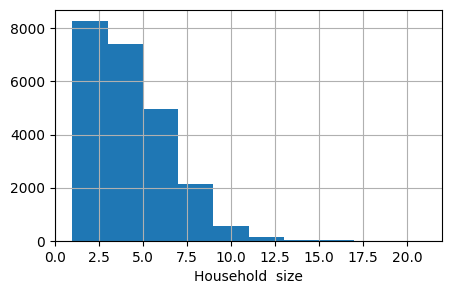

In [13]:
plt.figure(figsize=(5, 3))
original_train.household.hist() 
plt.xlabel('Household  size');

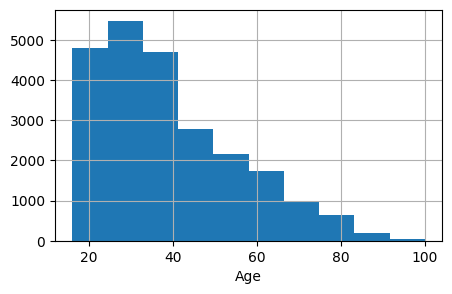

In [14]:
plt.figure(figsize=(5, 3))
original_train.age.hist() 
plt.xlabel('Age');

In [15]:
### add more plots about distributions here, see notebook "Johanna"

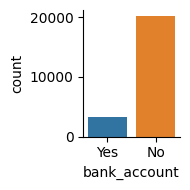

In [16]:
sns.catplot(x="bank_account", kind="count", data=original_train, height=2)

In [17]:
features = ['country','location', 'cellphone','gender', 'status_household', 'marital_status','education', 'job']

for i in features:
    print(original_train[i].value_counts(normalize=True).round(2))

Rwanda      0.37
Tanzania    0.28
Kenya       0.26
Uganda      0.09
Name: country, dtype: float64
Rural    0.61
Urban    0.39
Name: location, dtype: float64
Yes    0.74
No     0.26
Name: cellphone, dtype: float64
Female    0.59
Male      0.41
Name: gender, dtype: float64
Head of Household      0.55
Spouse                 0.28
Child                  0.09
Parent                 0.05
Other relative         0.03
Other non-relatives    0.01
Name: status_household, dtype: float64
Married/Living together    0.46
Single/Never Married       0.34
Widowed                    0.12
Divorced/Seperated         0.09
Dont know                  0.00
Name: marital_status, dtype: float64
Primary education                  0.54
No formal education                0.19
Secondary education                0.18
Tertiary education                 0.05
Vocational/Specialised training    0.03
Other/Dont know/RTA                0.00
Name: education, dtype: float64
Self employed                   0.27
Informally empl

In [18]:
d = {}
for i in features:
    d[i] = pd.crosstab(original_train[i], original_train['bank_account'], normalize='index').mul(100).round(2)

In [19]:
d['country']

bank_account,No,Yes
country,,
Kenya,74.93,25.07
Rwanda,88.52,11.48
Tanzania,90.83,9.17
Uganda,91.39,8.61


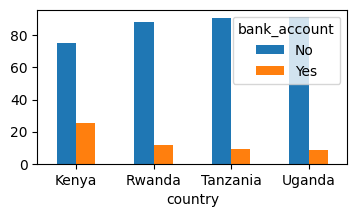

In [20]:
d['country'].plot.bar(figsize=(4,2), rot=0);

In [21]:
d['location']

bank_account,No,Yes
location,,
Rural,88.35,11.65
Urban,82.13,17.87


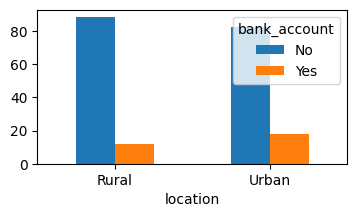

In [22]:
d['location'].plot.bar(figsize=(4,2), rot=0);

In [23]:
d['cellphone']

bank_account,No,Yes
cellphone,,
No,98.29,1.71
Yes,81.62,18.38


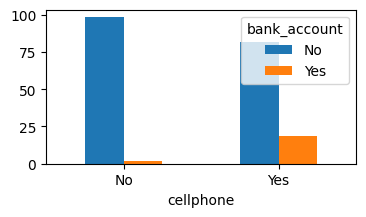

In [24]:
d['cellphone'].plot.bar(figsize=(4,2), rot=0);

In [25]:
d['gender']

bank_account,No,Yes
gender,,
Female,89.32,10.68
Male,81.03,18.97


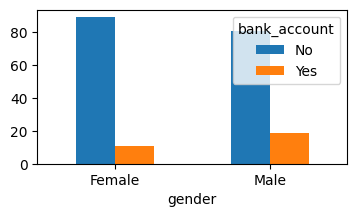

In [26]:
d['gender'].plot.bar(figsize=(4,2), rot=0);

In [27]:
d['status_household']

bank_account,No,Yes
status_household,,
Child,91.34,8.66
Head of Household,82.29,17.71
Other non-relatives,89.47,10.53
Other relative,90.12,9.88
Parent,94.01,5.99
Spouse,89.34,10.66


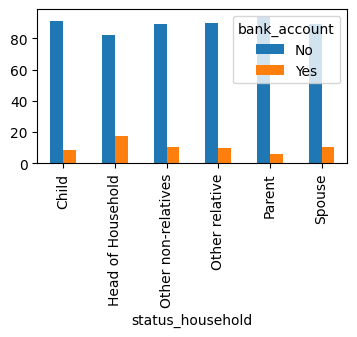

In [28]:
d['status_household'].plot.bar(figsize=(4,2), rot=90);

In [29]:
d['marital_status'].head(10)

bank_account,No,Yes
marital_status,,
Divorced/Seperated,88.73,11.27
Dont know,75.00,25.00
Married/Living together,82.64,17.36
Single/Never Married,87.90,12.10
Widowed,90.99,9.01


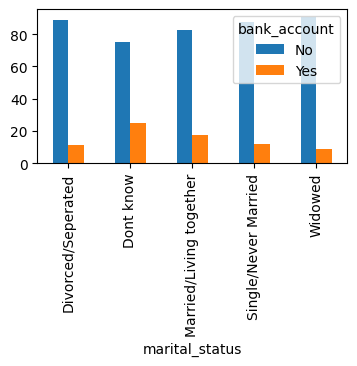

In [30]:
d['marital_status'].plot.bar(figsize=(4,2), rot=90);

In [31]:
d['education']

bank_account,No,Yes
education,,
No formal education,96.10,3.90
Other/Dont know/RTA,68.57,31.43
Primary education,91.45,8.55
Secondary education,76.72,23.28
Tertiary education,48.92,51.08
Vocational/Specialised training,42.96,57.04


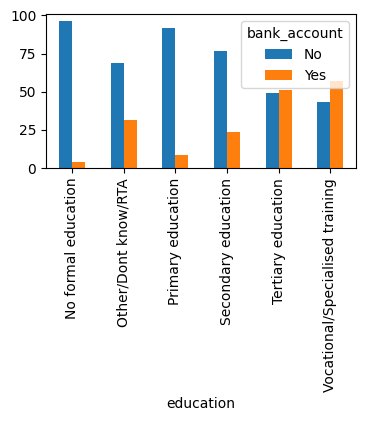

In [32]:
d['education'].plot.bar(figsize=(4,2), rot=90);

In [33]:
d['job']

bank_account,No,Yes
job,,
Dont Know/Refuse to answer,88.89,11.11
Farming and Fishing,88.33,11.67
Formally employed Government,22.48,77.52
Formally employed Private,45.88,54.12
Government Dependent,79.76,20.24
Informally employed,92.05,7.95
No Income,97.93,2.07
Other Income,81.85,18.15
Remittance Dependent,90.50,9.50


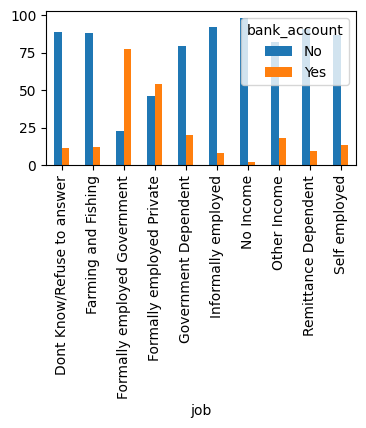

In [34]:
d['job'].plot.bar(figsize=(4,2), rot=90);

In [35]:
df_edu_job = pd.crosstab(original_train['job'], original_train['education'], normalize='index').mul(100).round(2)
df_edu_job.head(10)

education,No formal education,Other/Dont know/RTA,Primary education,Secondary education,Tertiary education,Vocational/Specialised training
job,,,,,,
Dont Know/Refuse to answer,14.29,0.00,59.52,23.81,1.59,0.79
Farming and Fishing,25.82,0.00,55.25,16.21,0.97,1.75
Formally employed Government,1.03,0.52,10.85,33.59,31.27,22.74
Formally employed Private,3.13,0.19,31.00,25.12,21.23,19.34
Government Dependent,53.04,0.40,37.25,3.64,3.24,2.43
Informally employed,20.19,0.29,60.87,14.11,3.14,1.39
No Income,18.50,0.48,49.92,22.49,7.50,1.12
Other Income,17.04,0.28,47.78,26.39,4.35,4.17
Remittance Dependent,19.55,0.08,37.87,31.78,6.89,3.84


<AxesSubplot:xlabel='job'>

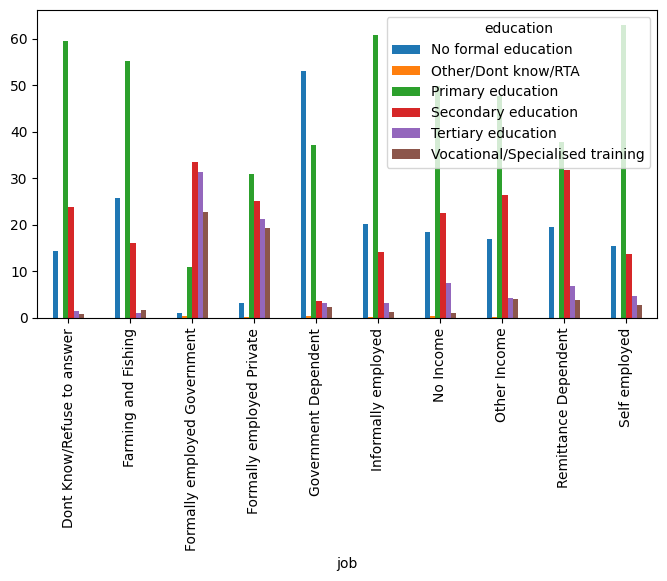

In [36]:
df_edu_job.plot.bar(figsize=(8,4), rot=90)

## Clustering

In [37]:
from sklearn import preprocessing
original_scaled = original_train.drop(['country', 'year', 'uniqueid', 'bank_account'], axis=1)
scaler = preprocessing.MinMaxScaler()
original_scaled[['age','household']] = scaler.fit_transform(original_scaled[['age','household']])

In [38]:
original_scaled.head()

,location,cellphone,household,age,gender,status_household,marital_status,education,job
0,Rural,Yes,0.10,0.095238,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Rural,No,0.20,0.642857,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Urban,Yes,0.20,0.119048,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Rural,Yes,0.20,0.214286,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Urban,No,0.35,0.119048,Male,Child,Single/Never Married,Primary education,Informally employed


In [39]:
from kmodes.kprototypes import KPrototypes

this takes too long, don't want to run each time I restart the Kernel

```
cost = []
K = range(1,6)
for num_clusters in list(K):
    kproto = KPrototypes (n_clusters=num_clusters, init = "Cao", n_init = 5, verbose=1)
    kproto.fit_predict(original_scaled, categorical=[0,1,4,5,6,7,8])
    cost.append(kproto.cost_)
```

In [40]:
# cost for categorical = [0,1,4,5,6,7,8]

K = range(1,6)
cost = [7068.925356026547,
 5832.552873017828,
 5177.215165674177,
 4887.292889315356,
 4716.1088030695055]

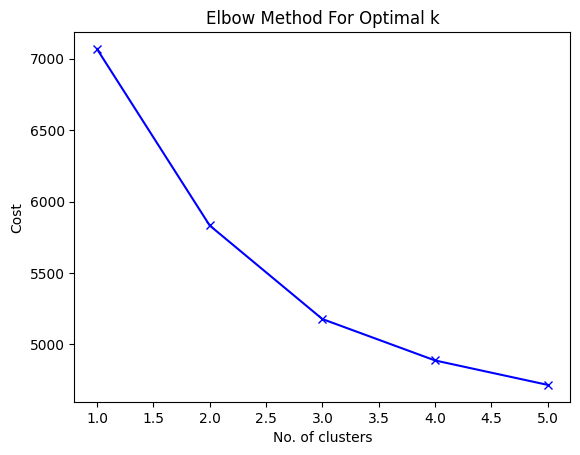

In [41]:
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

takes too long, fit and use kproto model

```
kproto = KPrototypes(n_clusters=4, init='Cao')
clusters = kproto.fit_predict(original_scaled, categorical=[0,1,4,5,6,7,8])
```

```
df_cluster = pd.Series(clusters, name='Cluster')
df_clustered = pd.concat([original_train, df_cluster], axis=1)

df_clustered['Segment'] = df_clustered['Cluster'].map({0:'First', 1:'Second', 2:'Third', 3: 'Fourth'})
df_clustered['Segment'] = df_clustered['Segment'].astype('category')

df_clustered = df_clustered.drop(['year', 'uniqueid', 'country', 'bank_account'], axis=1)

df_clustered.groupby('Segment').agg(
    {'Cluster':'count',
    'location': lambda x: x.value_counts().index[0],
    'cellphone': lambda x: x.value_counts().index[0],
    'household': 'mean',
    'age': 'mean',
    'gender': lambda x: x.value_counts().index[0],
    'status_household': lambda x: x.value_counts().index[0],
    'marital_status': lambda x: x.value_counts().index[0],
    'education': lambda x: x.value_counts().index[0],
    'job': lambda x: x.value_counts().index[0],
    }
).reset_index()

df_bankaccount_per_cluster = pd.crosstab(df_clustered['Segment'], df_clustered['bank_account'], normalize='index').mul(100).round(2)
df_bankaccount_per_cluster.head()
```

### Data Cleaning, Preprocessing #1

In [42]:
original_train.head(2)

,country,year,uniqueid,bank_account,location,cellphone,household,age,gender,status_household,marital_status,education,job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent


In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [44]:
#convert target variable to numeric
le = LabelEncoder()
original_train['bank_account'] = le.fit_transform(original_train['bank_account'])

In [45]:
#Separate training features from target
X_train = original_train.drop(['bank_account'], axis=1)
y_train = original_train['bank_account']

In [46]:
# this has to be repeated for original_test!

X_train = X_train.drop(["uniqueid", "year"], axis=1)

country_dummies = pd.get_dummies(X_train['country'], prefix='country', drop_first=True)
location_dummies = pd.get_dummies(X_train['location'], prefix='location', drop_first=True)
cellphone_dummies = pd.get_dummies(X_train['cellphone'], prefix='cellphone', drop_first=True)
gender_dummies = pd.get_dummies(X_train['gender'], prefix='gender', drop_first=True)
marital_status_dummies = pd.get_dummies(X_train['marital_status'], prefix='marital_status', drop_first=True)
job_dummies = pd.get_dummies(X_train['job'], prefix='job', drop_first=True)
status_household_dummies = pd.get_dummies(X_train['status_household'], prefix='status_household', drop_first=True)

X_train = pd.concat([X_train, country_dummies, location_dummies, cellphone_dummies, gender_dummies, marital_status_dummies, job_dummies, status_household_dummies], axis=1)

edu_mapping = {'No formal education': 0, 
               'Primary education' : 2, 
               'Other/Dont know/RTA': 1,
               'Vocational/Specialised training': 4, 
               'Secondary education': 3, 
               'Tertiary education' : 5}

X_train = X_train.assign(edu_cat = X_train.education.map(edu_mapping))

X_train = X_train.drop(['country', 'location', 'cellphone', 'gender', 'marital_status', 'education', 'job', 'status_household'], axis=1)

scaler = MinMaxScaler(feature_range=(0, 1))
columns_to_scale = ['household', 'age', 'country_Rwanda', 'country_Tanzania',
       'country_Uganda', 'location_Urban', 'cellphone_Yes', 'gender_Male',
       'marital_status_Dont know', 'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'job_Farming and Fishing', 'job_Formally employed Government',
       'job_Formally employed Private', 'job_Government Dependent',
       'job_Informally employed', 'job_No Income', 'job_Other Income',
       'job_Remittance Dependent', 'job_Self employed',
       'status_household_Head of Household',
       'status_household_Other non-relatives',
       'status_household_Other relative', 'status_household_Parent',
       'status_household_Spouse', 'edu_cat']
processed_X_train = scaler.fit_transform(X_train[columns_to_scale])

In [47]:
X_train

,household,age,country_Rwanda,country_Tanzania,country_Uganda,location_Urban,cellphone_Yes,gender_Male,marital_status_Dont know,marital_status_Married/Living together,...,job_No Income,job_Other Income,job_Remittance Dependent,job_Self employed,status_household_Head of Household,status_household_Other non-relatives,status_household_Other relative,status_household_Parent,status_household_Spouse,edu_cat
0,3,24,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,3
1,5,70,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,5,26,0,0,0,1,1,1,0,0,...,0,0,0,1,0,0,1,0,0,4
3,5,34,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,2
4,8,26,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,4,48,0,0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
23520,2,27,0,0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,3
23521,5,27,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,2
23522,7,30,0,0,1,1,1,0,0,0,...,0,0,0,1,0,0,0,1,0,3


In [48]:
X_Train, X_Val, y_Train, y_Val = train_test_split(processed_X_train, y_train, stratify = y_train, 
                                                  test_size = 0.2, random_state=RSEED)

# New approach with SMOTE

In [49]:

from collections import Counter
from numpy import where
from matplotlib import pyplot
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline 

In [50]:
counter = Counter(y_Train)
print(counter)

Counter({0: 16169, 1: 2650})


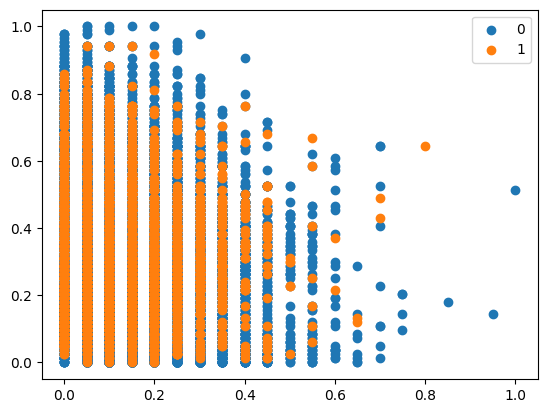

In [51]:
for label , _ in counter.items():
    row_ix = where(y_train == label)[0]
    pyplot.scatter(processed_X_train[row_ix, 0], processed_X_train[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [52]:
over = SMOTE(sampling_strategy=0.3, random_state=RSEED)

In [53]:
X, y = over.fit_resample(X_Train, y_Train)

In [54]:
counter = Counter(y)
print(counter)

Counter({0: 16169, 1: 4850})


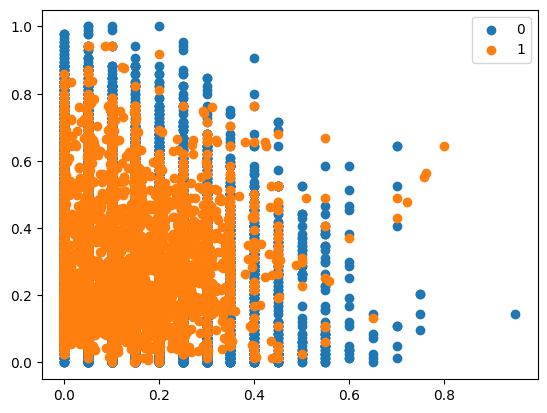

In [55]:
for label , _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

# Model 1 Decision Tree

In [56]:
Tree = DecisionTreeClassifier(criterion='gini', max_depth=15, random_state=RSEED)
Tree.fit(X, y) 

DecisionTreeClassifier(max_depth=15, random_state=33)

In [57]:
y_pred_Train_tree = Tree.predict(X)
y_pred_Val_tree = Tree.predict(X_Val)

In [58]:
print('Accuracy Train: ',metrics.accuracy_score(y, y_pred_Train_tree))
print('Accuracy Test: ',metrics.accuracy_score(y_Val, y_pred_Val_tree))
print('F1-score Train: ',metrics.f1_score(y, y_pred_Train_tree, pos_label=1))
print('F1-score Test: ',metrics.f1_score(y_Val, y_pred_Val_tree, pos_label=1))
print('Recall Train: ',metrics.recall_score(y, y_pred_Train_tree, pos_label=1))
print('Recall Test: ',metrics.recall_score(y_Val, y_pred_Val_tree, pos_label=1))

Accuracy Train:  0.9155050192682811
Accuracy Test:  0.8609989373007438
F1-score Train:  0.7979981801637853
F1-score Test:  0.45681063122923593
Recall Train:  0.723298969072165
Recall Test:  0.41540785498489424


In [59]:
cfm_tree = metrics.confusion_matrix(y_Val, y_pred_Val_tree)

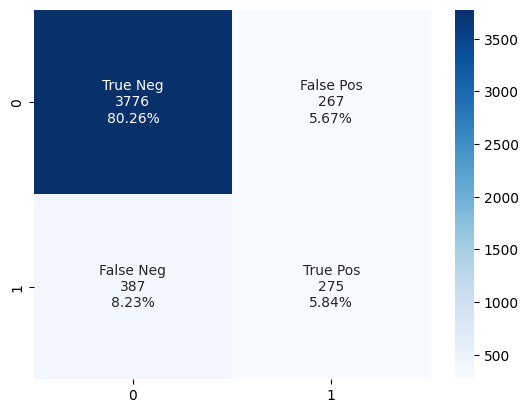

In [60]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cfm_tree.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cfm_tree.flatten()/np.sum(cfm_tree)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cfm_tree, annot=labels, fmt='', cmap='Blues');

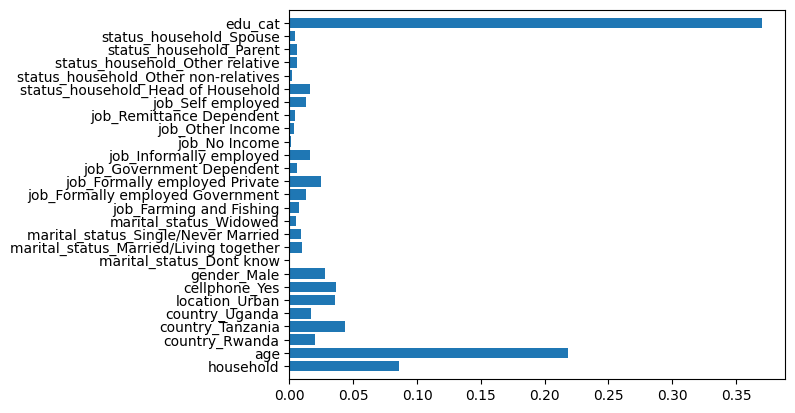

In [82]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features),model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features),X_train.columns)
    plt.ylim(-1,n_features)
    
plot_feature_importances(Tree)

# Model 2 Logistic Regression

In [65]:
logreg = LogisticRegression(random_state=RSEED)
logreg.fit(X, y) 

LogisticRegression(random_state=33)

In [66]:
y_pred_Train_log = logreg.predict(X)
y_pred_Val_log = logreg.predict(X_Val)

In [67]:
print('Accuracy Train: ',metrics.accuracy_score(y, y_pred_Train_log))
print('Accuracy Test: ',metrics.accuracy_score(y_Val, y_pred_Val_log))
print('F1-score Train: ',metrics.f1_score(y, y_pred_Train_log, pos_label=1))
print('F1-score Test: ',metrics.f1_score(y_Val, y_pred_Val_log, pos_label=1))
print('Recall Train: ',metrics.recall_score(y, y_pred_Train_log, pos_label=1))
print('Recall Test: ',metrics.recall_score(y_Val, y_pred_Val_log, pos_label=1))

Accuracy Train:  0.8368618868642657
Accuracy Test:  0.8788522848034006
F1-score Train:  0.5681904042312051
F1-score Test:  0.49823943661971826
Recall Train:  0.46515463917525773
Recall Test:  0.42749244712990936


In [68]:
cfm_log = metrics.confusion_matrix(y_Val, y_pred_Val_log)

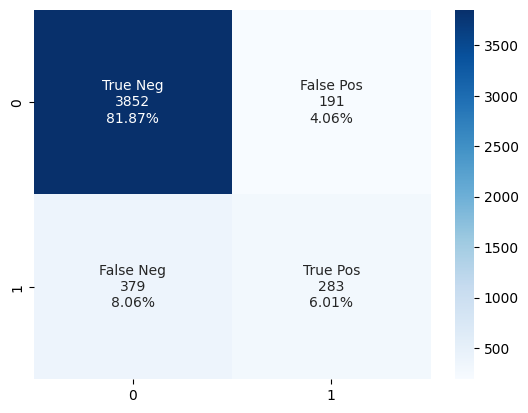

In [69]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cfm_log.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cfm_log.flatten()/np.sum(cfm_log)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cfm_log, annot=labels, fmt='', cmap='Blues');

# Model 3 Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rf = RandomForestClassifier(n_estimators = 600, max_depth = 15, random_state = RSEED)
rf.fit(X, y) 

RandomForestClassifier(max_depth=15, n_estimators=600, random_state=33)

In [92]:
y_pred_Train_rf = rf.predict(X)
y_pred_Val_rf = rf.predict(X_Val)

In [93]:
print('Accuracy Train: ',metrics.accuracy_score(y, y_pred_Train_rf))
print('Accuracy Test: ',metrics.accuracy_score(y_Val, y_pred_Val_rf))
print('F1-score Train: ',metrics.f1_score(y, y_pred_Train_rf, pos_label=1))
print('F1-score Test: ',metrics.f1_score(y_Val, y_pred_Val_rf, pos_label=1))
print('Recall Train: ',metrics.recall_score(y, y_pred_Train_rf, pos_label=1))
print('Recall Test: ',metrics.recall_score(y_Val, y_pred_Val_rf, pos_label=1))
print('Precision Train: ',metrics.precision_score(y, y_pred_Train_rf, pos_label=1))
print('Precision Test: ',metrics.precision_score(y_Val, y_pred_Val_rf, pos_label=1))

Accuracy Train:  0.9140777391883534
Accuracy Test:  0.881615302869288
F1-score Train:  0.788623595505618
F1-score Test:  0.49225159525979945
Recall Train:  0.694639175257732
Recall Test:  0.4078549848942598
Precision Train:  0.9120194910665945
Precision Test:  0.6206896551724138


In [94]:
cfm_rf = metrics.confusion_matrix(y_Val, y_pred_Val_rf)

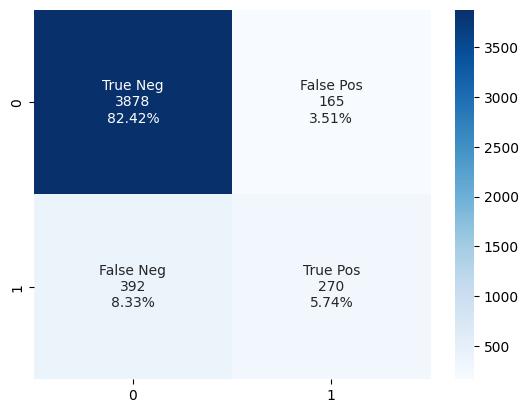

In [95]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cfm_rf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cfm_rf.flatten()/np.sum(cfm_rf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cfm_rf, annot=labels, fmt='', cmap='Blues');

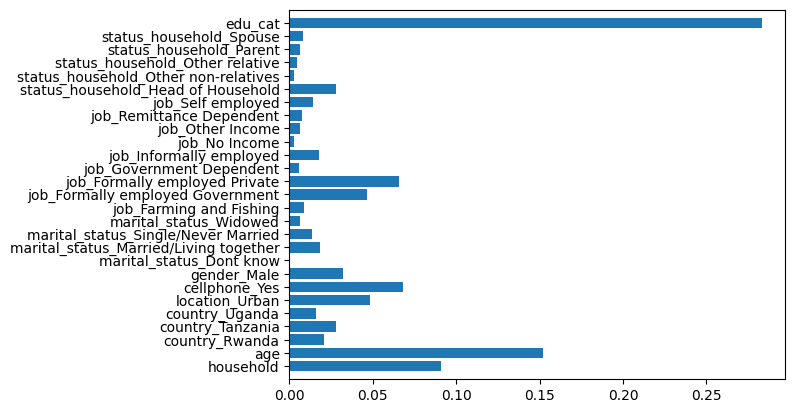

In [96]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features),model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features),X_train.columns)
    plt.ylim(-1,n_features)
    
plot_feature_importances(rf)

# Model 4 KNN

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit (X,y)

KNeighborsClassifier(metric='euclidean')

In [94]:
y_pred_Train_knn = rf.predict(X)
y_pred_Val_knn = rf.predict(X_Val)

In [95]:
print('Accuracy Train: ',metrics.accuracy_score(y, y_pred_Train_knn))
print('Accuracy Test: ',metrics.accuracy_score(y_Val, y_pred_Val_knn))
print('F1-score Train: ',metrics.f1_score(y, y_pred_Train_knn, pos_label=1))
print('F1-score Test: ',metrics.f1_score(y_Val, y_pred_Val_knn, pos_label=1))
print('Recall Train: ',metrics.recall_score(y, y_pred_Train_knn, pos_label=1))
print('Recall Test: ',metrics.recall_score(y_Val, y_pred_Val_knn, pos_label=1))
print('Precision Train: ',metrics.precision_score(y, y_pred_Train_knn, pos_label=1))
print('Precision Test: ',metrics.precision_score(y_Val, y_pred_Val_knn, pos_label=1))

Accuracy Train:  0.961177981825967
Accuracy Test:  0.8720510095642933
F1-score Train:  0.9108001749016179
F1-score Test:  0.45471014492753625
Recall Train:  0.8589690721649484
Recall Test:  0.37915407854984895
Precision Train:  0.9692880409492788
Precision Test:  0.5678733031674208


In [96]:
cfm_knn = metrics.confusion_matrix(y_Val, y_pred_Val_knn)

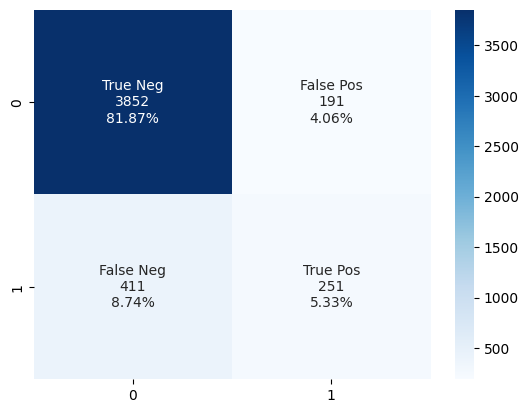

In [97]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cfm_knn.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cfm_knn.flatten()/np.sum(cfm_knn)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cfm_knn, annot=labels, fmt='', cmap='Blues');